# Titanic Survival Prediction

## Data Dictionary
| Variable| Definition| Key                                             |
|---|---|-------------------------------------------------|
| survival| Survival| 0 = No, 1 = Yes                                 |
| pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd                       |
| sex| Sex                                                                |
| Age| Age in years                                                       |
| sibsp| # of siblings / spouses aboard the Titanic                         |
| parch| # of parents / children aboard the Titanic                         |
| ticket| Ticket number                                                      |
| fare| Passenger fare                                                     |
| cabin| Cabin number                                                       |
| embarked| Port of Embarkation| C = Cherbourg, Q = Queenstown, S = Southampton |

## Variable Notes
**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [85]:
import pandas as pd
import seaborn as sns

In [86]:
sns.set_theme(style="darkgrid", palette="dark")

## Exploratory Data Analysis (EDA)

### Reading Dataset
Data is from <https://www.kaggle.com/competitions/titanic/data>.

In [87]:
train_df = pd.read_csv("train.csv")

In [88]:
test_df = pd.read_csv("test.csv")

### Viewing Data

In [89]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [91]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Data Dimensions

In [93]:
train_df.shape

(891, 12)

In [94]:
test_df.shape

(418, 11)

### Column Names

In [95]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Metadata

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Descriptive Statistics

In [99]:
dtype = {"PassengerId": "object", "Survived": "object", "Pclass": "object"}
train_df = train_df.astype(dtype)

train_df.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [100]:
train_df.describe(include="object")

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,891,2,3,891,2,681,147,3
top,1,0,3,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,549,491,1,577,7,4,644


### Distribution of Survived

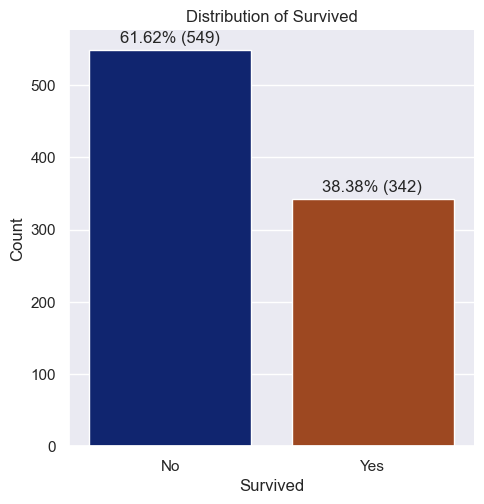

In [107]:
catplot = sns.catplot(x="Survived", data=train_df, kind="count")
catplot.set(
    ylabel="Count",
    xticklabels=["No", "Yes"],
    title="Distribution of Survived"
)

for patch, category in zip(catplot.ax.patches, [0, 1]):
    height = patch.get_height()
    category_count = sum(train_df.Survived == category)
    category_percentage = category_count / len(train_df) * 100
    text = f"{category_percentage:1.2f}% ({category_count:,})"
    catplot.ax.text(patch.get_x() + 0.15, height + 10, text)

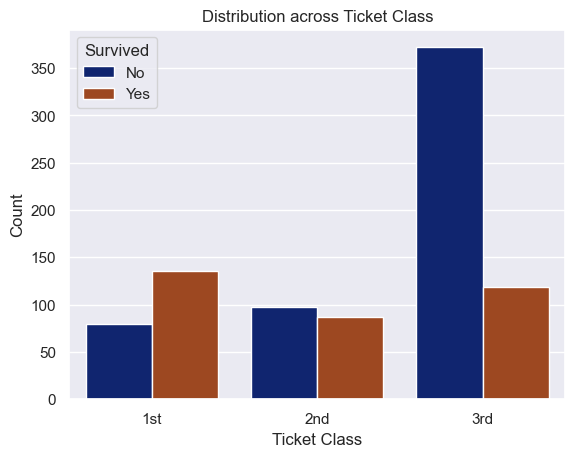

In [111]:
countplot = sns.countplot(x="Pclass", hue="Survived", data=train_df)
countplot.set(
    xlabel="Ticket Class",
    ylabel="Count",
    xticklabels=["1st", "2nd", "3rd"],
    title="Distribution across Ticket Class"
)
countplot.legend(labels=["No", "Yes"], title="Survived")

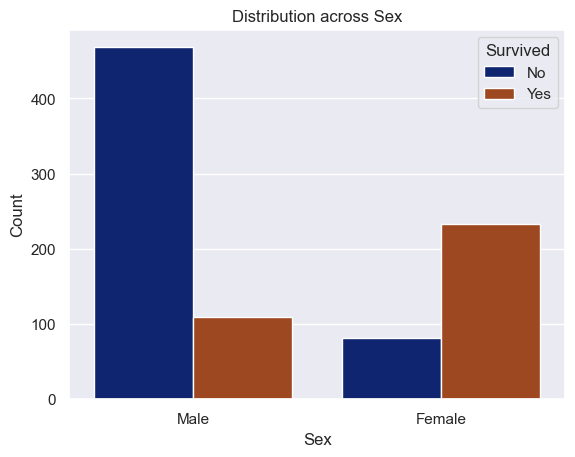

In [113]:
countplot = sns.countplot(x="Sex", hue="Survived", data=train_df)
countplot.set(
    xlabel="Sex",
    ylabel="Count",
    xticklabels=["Male", "Female"],
    title="Distribution across Sex"
)
countplot.legend(labels=["No", "Yes"], title="Survived")

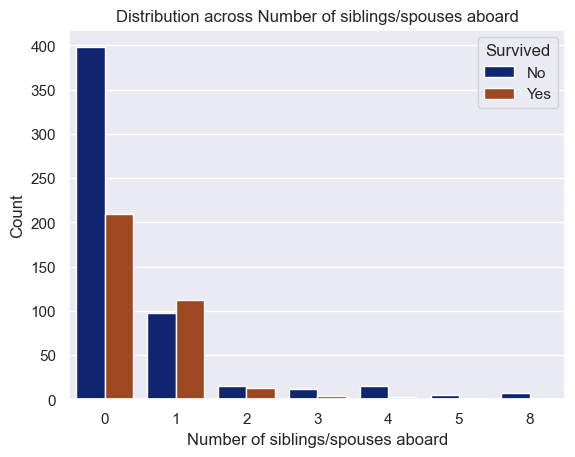

In [120]:
countplot = sns.countplot(x="SibSp", hue="Survived", data=train_df)
countplot.set(
    xlabel="Number of siblings/spouses aboard",
    ylabel="Count",
    title="Distribution across Number of siblings/spouses aboard"
)
countplot.legend(labels=["No", "Yes"], title="Survived")

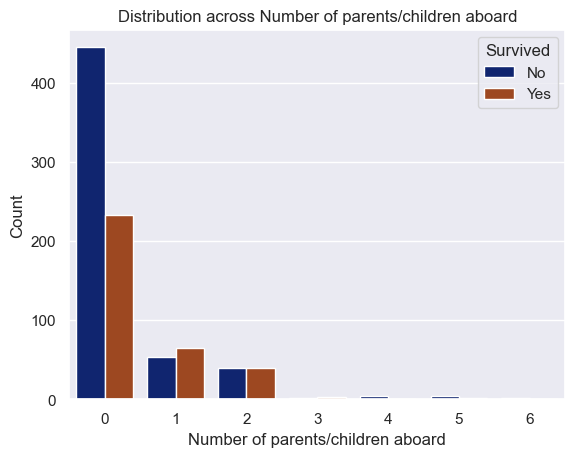

In [121]:
countplot = sns.countplot(x="Parch", hue="Survived", data=train_df)
countplot.set(
    xlabel="Number of parents/children aboard",
    ylabel="Count",
    title="Distribution across Number of parents/children aboard"
)
countplot.legend(labels=["No", "Yes"], title="Survived")

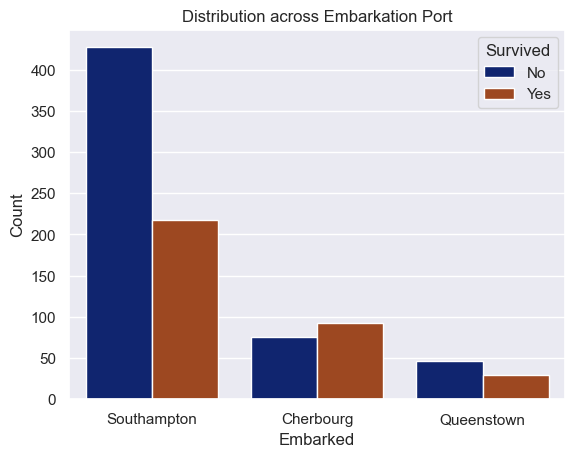

In [117]:
countplot = sns.countplot(x="Embarked", hue="Survived", data=train_df)
countplot.set(
    xlabel="Embarked",
    ylabel="Count",
    xticklabels=["Southampton", "Cherbourg", "Queenstown"],
    title="Distribution across Embarkation Port"
)
countplot.legend(labels=["No", "Yes"], title="Survived")

In [ ]:
# TODO: Distribution across wide-numeric